<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/2c2025/ICDIC_TP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 0: Repaso de probabilidad e introducción a Python
**Objetivos:** El objetivo de este trabajo es repasar algunos conceptos fundamentales de probabilidad que luego serán de uso extenso en el resto de la materia. Además, busca que los alumnos den sus primeros pasos en Python y Google Colab.

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: para graficar
* Scipy: Librería con funciones de distribución analíticas y herramientas de simulación


In [ ]:
# para el TP
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

# para registrar el tiempo de corrida
import datetime

In [ ]:
start_datetime = datetime.datetime.now()

print('Inicio de corrida: ',start_datetime)

Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Funciones de distribución

Una variable aleatoria $T$ tiene la siguiente función de distribución acumulada: $F_T (t) = 1 - e^{-10t^2},\ t \geq 0$. Se pide lo siguiente:

### Actividad 1

**Actividad**: Calcular $P (T > 0.4 )$

In [ ]:
# CODIGO DEL ALUMNO ============================================================



respuesta_1_1 =
# ==============================================================================

print('La probabilidad de T>0.4 es',np.round(respuesta_1_1*100,1),'%')

La probabilidad de T>0.4 es 20.2 %


### Actividad 2

**Actividad**: Calcular $P (0.4 < T < 0.8)$

In [ ]:
# CODIGO DEL ALUMNO ============================================================


respuesta_1_2 =
# ==============================================================================

print('La probabilidad de 0.4<T<0.8 es',np.round(respuesta_1_2*100,1),'%')

La probabilidad de 0.4<T<0.8 es 20.0 %


### Actividad 3

**Actividad**: Calcular el intervalo de confianza central del 90%

In [ ]:
# CODIGO DEL ALUMNO ============================================================




respuesta_1_3 =
# ==============================================================================

print('El intervalo de confianza de 90% es',np.round(respuesta_1_3,2))

El intervalo de confianza de 90% es [0.07 0.55]


### Actividad 4

**Actividad**: Calcular y graficar la densidad de probabilidad $f_T (t)$

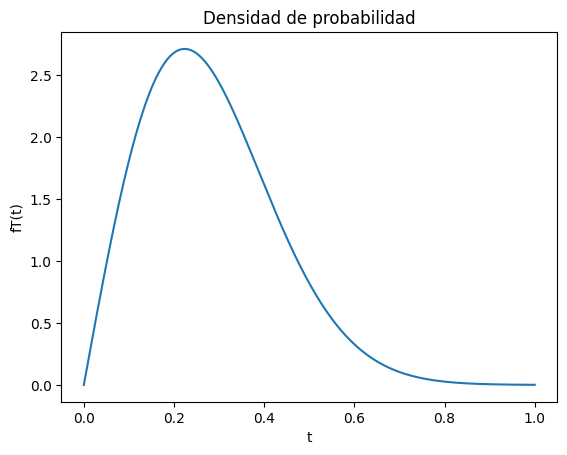

In [ ]:
# CODIGO DEL ALUMNO ============================================================











# ==============================================================================
plt.show()

### Actividad 5

**Actividad**: Calcular el valor medio, la moda y la mediana

In [ ]:
# CODIGO DEL ALUMNO ============================================================







mu =
moda =
mediana =
# ==============================================================================
print('El valor medio es',np.round(mu,4))
print('La moda es',np.round(moda,4))
print('La mediana es',np.round(mediana,4))

El valor medio es 0.2802
La moda es 0.2236
La mediana es 0.2633


### Actividad 6

**Actividad**: Calcular el desvío estándar y el coeficiente de variación

In [ ]:
# CODIGO DEL ALUMNO ============================================================



std =
cv =
# ==============================================================================
print('El desvío estandar es',np.round(std,4))
print('El coeficiente de variacion es',np.round(cv*100,2),'%')

El desvío estandar es 0.1465
El coeficiente de variacion es 52.27 %


## Ejercicio 2: Múltiples variables aleatorias y simulaciones

Las variables aleatorias $X$ y $Y$ tienen una distirbución Normal conjunta, con los siguientes momentos: $\mu_X=10$, $\sigma_X=5$, $mu_Y=10$, $\sigma_Y=5$, $\rho=0.8$.

Las simulaciones de $X,Y$ las vamos a generar usando la función de scipy.stats

In [ ]:
# Parametros de la distribucion normal bivariada
medias = [10, 10]  # vector de valores medios
matriz_covarianza = [[5*5, 0.8*5*5], [0.8*5*5, 5*5]]  # matriz de covarianza

# Generar simulaciones
np.random.seed(seed=0)
Nsim = 10000
simulaciones = stats.multivariate_normal.rvs(medias, matriz_covarianza,
                                             size=Nsim)

# separar en simulaciones de X e Y
X, Y = simulaciones.T

### Actividad 1

**Actividad**: Calcular $P (X>12)$ en forma analítica y a través de simulaciones.

In [ ]:
# CODIGO DEL ALUMNO ============================================================
resultado_2_1 =


an_2_1 =
# ==============================================================================
print('La probabilidad de X>12 (por simulaciones) es',
      np.round(resultado_2_1*100,2),'%')
print('El resultado analítico es',
      np.round(an_2_1*100,2),'%')

La probabilidad de X>12 (por simulaciones) es 35.04 %
El resultado analítico es 34.46 %


### Actividad 2

**Actividad**: Calcular $P (X > 12 | Y<15)$ mediante simulaciones.

In [ ]:
# CODIGO DEL ALUMNO ============================================================
resultado_2_2 =
# ==============================================================================
# cambio de variables Z=-X
zy_norm = stats.multivariate_normal(medias*np.array([-1, 1]),
                                    matriz_covarianza*np.array([[1, -1], [-1, 1]]))
y_norm = stats.norm(10,5)
an_2_2 = zy_norm.cdf([-12,15])/y_norm.cdf(15)

print('La probabilidad de X>12 dado Y<15 (por simulaciones) es',
      np.round(resultado_2_2*100,2),'%')
print('El resultado analítico es',
      np.round(an_2_2*100,2),'%')

La probabilidad de X>12 dado Y<15 (por simulaciones) es 24.67 %
El resultado analítico es 24.29 %


### Actividad 3

**Actividad**: Calcular $P (X > Y | Y<15)$ mediante simulaciones.

In [ ]:
# CODIGO DEL ALUMNO ============================================================
resultado_2_3 =
# ==============================================================================
# Solucion por integracion con Scipy
xy_norm = stats.multivariate_normal(medias,matriz_covarianza)

num,num_err = sp.integrate.dblquad(lambda x,y: xy_norm.pdf([x,y]),
                                   -np.inf, 15, lambda y: y, np.inf)
den = y_norm.cdf(15)
an_2_3 = num / den

print('La probabilidad de X>Y dado Y<15 (por simulaciones) es',
      np.round(resultado_2_3*100,2),'%')
print('El resultado analítico es',
      np.round(an_2_3*100,2),'%')

La probabilidad de X>Y dado Y<15 (por simulaciones) es 54.08 %
El resultado analítico es 53.63 %


### Actividad 4

**Actividad**: Calcular y graficar la función de densidad de probabilidad $f_X (x)$ (analíticamente, y a través de simulaciones)

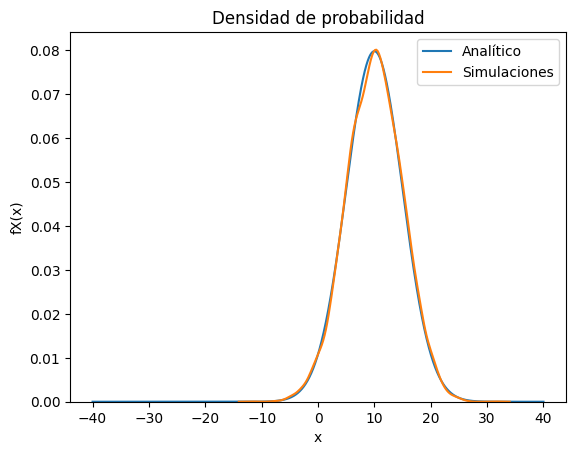

In [ ]:
# CODIGO DEL ALUMNO ============================================================











# ==============================================================================
plt.show()

## Ejercicio 4: Teorema de Bayes

En un pueblo pequeño cercano a Mendoza, un terremoto de magnitud $M=6$ sacudió las edificaciones provocando un colapso. La primera pregunta que cualquier ingeniero se hace ante esta situación es ¿por qué?

Bueno, por un lado, sabemos que los edificios se diseñan aceptando cierta probabilidad de colapso. En este caso, podemos considerar que la probabilidad de colapso ($C=1$) de un edificio diseñado con el reglamento actual aprobado por el municipio es 5% ($R=1$) para un sismo de esta magnitud.

Mientras tanto, edificaciones viejas de mamposteria ($R=0$) son mucho más vulnerables. De un análisis no-lineal de este tipo de estructuras, se ha visto que la probabilidad de colapso ($C=1$) ante sismos de esta magnitud es de 20%.

$$P(C=1|R=0)=0.20$$

Por otro lado, el pueblo útlimamente ha sido centro de un enorme crecimiento por el aumento de trabajo en la región, por lo que la mayoría de las casas han sido construidas con posterioridad de la aprobación del reglamento. En particular, de 2000 casas en el pueblo, tan solo 100 son de mampostería tradicional ($R=0$).

En la radio del pueblo llaman a 3 personas discutir acerca del colapso y sus implicancias.

- **Carlos**: El hijo de 17 años de un abogado constiuticionalista que vive en la zona y está arrancando su carrera periodística.
- **Juana**: Una ingeniera estructural oriunda del pueblo que estudió en la Universidad Nacional de Cuyo.
- **Alexandra**: Una ingeniera estructural norteamericana que estudió en Cornell.

Cada uno de ellos tiene distinta información (algunos conocen el inventario de edificios del pueblo, otros tienen conocimiento respecto al comportamiento de la estructuras, etc.) pero tienen que responder la misma consulta: ¿Qué cree que pudo haber pasado con la estructura colapsada?

O, dicho de otra manera, ¿la estructura que colapsó es de mampostería o moderna según su intuición?

**NOTA**: Carlos, al no ser ingeniero, asigna igual probabilidad de colapso a cada tipo de estructura (solo mira qué tipo de estructura es más probable). Alexandra, al no conocer el pueblo, asigna igual probabilidad de que una estructura sea nueva o vieja (solo mira qué tipo de estructura tiene más chances de colapsar en el vacío). Juana usa toda la información disponible

### Actividad 1

**Actividad**: Para cada una de las 3 personas, escriba su opinión en forma automática respecto a qué edificio a colapsado (con un `if` por ejemplo):

- "Carlos opina que la estructura colapsada es de mampostería" o
- "Carlos opina que la estructura colapsada es reciente"

e incluya el cálculo de probabilidad realizado. ¡Este es su primer modelo de predicción de su cursada!

*NOTA*: La decisión pueden hacerla comparando probabilidades en términos absolutos o relativos.

*NOTA 2*: Recuerden el teorema de Bayes cuando sea aplicable.

In [ ]:
# CODIGO DEL ALUMNO ============================================================






























# ==============================================================================

Carlos opina que la estructura colapsada es reciente, P = 0.95
Juana opina que la estructura colapsada es reciente, P = 0.83
Alexandra opina que la estructura colapsada es de mampostería, P = 0.8


### Actividad 2

Durante la mesa de debate el conductor comenta que entre los escombros se encontraron restos de asbesto ($A=1$) y que según el último censo 3 de cada 4 edificaciones tradicionales fueron construidas con asbesto ($R=0$), mientras que solo 1 de cada 10 estructuras construidas desde la adopción reglamentaria ($R=1$) presentaban este material.

¿Cómo actualiza esto las probabildades de que la estructura colapsada sea una efdicación antigua para cada panelista?

**Actividad**: Actualice el ejercicio anterior con la nueva información provista, aplicando el teorema de Bayes.

In [ ]:
# CODIGO DEL ALUMNO ============================================================

























# ==============================================================================

Carlos opina que la estructura colapsada es reciente, P = 0.72
Juana opina que la estructura colapsada es de mampostería, P = 0.61
Alexandra opina que la estructura colapsada es de mampostería, P = 0.97


### Actividad 3

**Actividad**: Repita el ejercicio para Juana pero considerando la probabilidad de que el edificio sea antiguo considerando la la presencia de asbesto primero, y luego aplicando bayes para considerar el colapso (es decir, invirtiendo el orden de llegada de la información)

¿Por qué termina dando lo mismo?

In [ ]:
# CODIGO DEL ALUMNO ============================================================







# ==============================================================================

Juana opina que la estructura colapsada es de mampostería, P = 0.61


**Su respuesta**:

## Ejercicio 5: Diversión con Variables Aleatorias

### Actividad 1

**Actividad**: Haga 10000 simulaciones de una variable aleatoria $X\sim N\left(\mu=2,\sigma=1\right)$ y calcule la media y el desvío estándar de las simulaciones para chequear el resultado. Guarde los resultados de la simulación en una variable `X`, y la media y desvio en las variables `mu_x` y `std_x`.

Media:  1.994
Desvio:  0.997


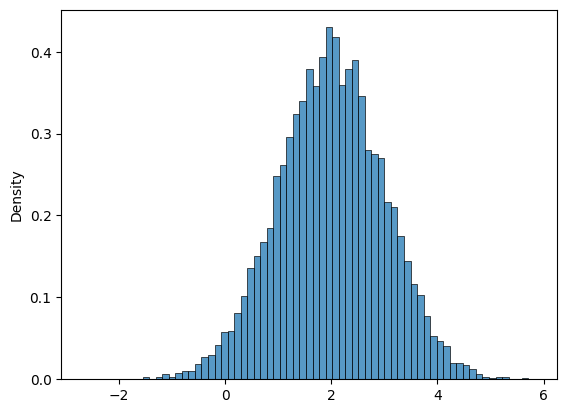

In [ ]:
n = 10000

# CODIGO DEL ALUMNO ============================================================
X =
mu_x =
std_x =
# ==============================================================================

print('Media: ',np.round(mu_x,3))
print('Desvio: ',np.round(std_x,3))

sns.histplot(X,stat="density")
plt.show()

### Actividad 2

**Actividad**: Haga 10000 simulaciones de una variable aleatoria $\log{Y}\sim N\left(\mu=1,\sigma=0.4\right)$ (recuerde que esto significa que $Y$ sigue una distribución lognormal). Estime la media de $Y$

Media:  2.945


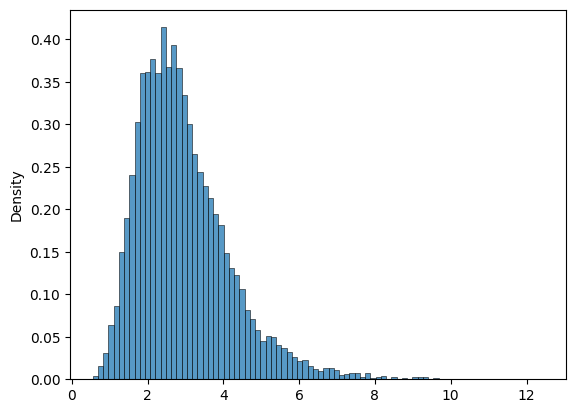

In [ ]:
# CODIGO DEL ALUMNO ============================================================
Y =
mu_y =
# ==============================================================================

print('Media: ',np.round(mu_y,3))

sns.histplot(Y,stat="density")
plt.show()

### Actividad 3

**Actividad**: ¿Cuál es la relación entre la media de $Y$ y los parámetros que debió incluir para simular la variable?

**Su respuesta**:

### Actividad 4

**Actividad**: Considerando $Z = X+Y$ calcule:


*   $P(Z>4)$ en `PZ4`
*   $P(Z>4|Y<2)$ en `PZ4Y2`
*   El valor medio de Z en `mu_z`

Pregunta 1: 71.61 %
Pregunta 2: 36.07 %
Pregunta 3: 4.939


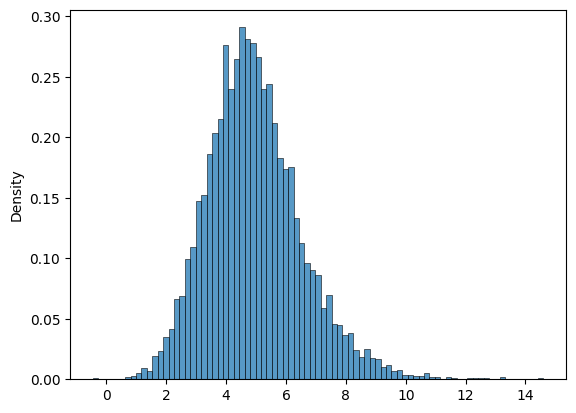

In [ ]:
# CODIGO DEL ALUMNO ============================================================
Z =

PZ4 =



PZ4Y2 =

mu_z =
# ==============================================================================

print('Pregunta 1:',np.round(PZ4*100,2),'%')
print('Pregunta 2:',np.round(PZ4Y2*100,2),'%')
print('Pregunta 3:',np.round(mu_z,3))

sns.histplot(Z,stat="density")
plt.show()

### Actividad 5

**Actividad**: ¿La variable $Z$ sigue alguna distribución en particular?

**Su respuesta**:

### Actividad 6

**Actividad**: Grafique función de probabilidad acumulada de $Z$ calcule $Z25$ tal que $P(Z<Z25)=0.25$ en `Z25`

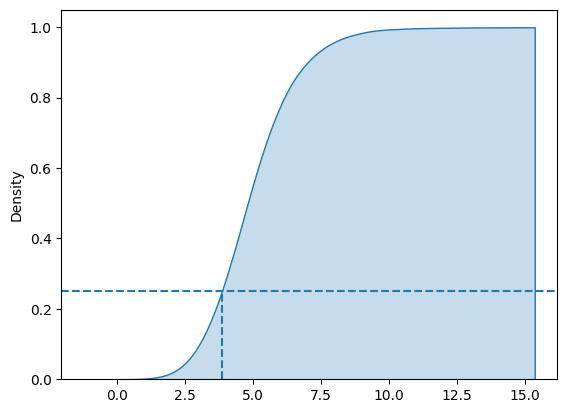

El cuantil 0.25 de Z es: 3.8749573873294842


In [ ]:
# CODIGO DEL ALUMNO ============================================================
Z25 =






# ==============================================================================

plt.show()
print('El cuantil 0.25 de Z es:',Z25)

# Entrega del Trabajo Práctico

Para la entrega del TP0, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Disconnect and delete runtime`,`run all`)
2. Revise que todos los resultados estén presentes y como ustedes esperaban.
3. Asegúrese haber contestado todas la preguntas que requieren prosa.
4. Descargue el arcihvo .ipynb en su computadora

Revisé que está todo como les gusta y ¡ya está listo! Ustedes son responables de que la entrega refleje sus intenciones, más allá de que nosotros podamos correr su archivo para revisar.

Los datos presentados abajo intentan ser para ustedes (y para nosotros) una verificación de que efectivamente han hecho la revisión final.

In [ ]:
print('Inicio de corrida: ',start_datetime)

end_datetime = datetime.datetime.now()
print('Fin de corrida: ',end_datetime)

elapsed_time = end_datetime-start_datetime
print('Tiempo de ejecución: ',round(elapsed_time.total_seconds()/60,1),'minutos')